In [1]:
#importing the required libraries and modules
import pandas as pd
from datetime import datetime
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib.pyplot as plt
#sklearn: helps in splitting the dataframe, creating decision tree classifier and guaging the accuracy of the predictions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
#reading file
df_500k = pd.read_csv("500k_records.csv")
df_census = pd.read_csv("census_data.csv")

/Users/yashnavalakha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#taking a look at the imported dataset - 500k dataset
df_500k.head()

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,days_since_last_pm,o1_no_days,o1_app_age_days,o1_total_parts,o1_parts_costs,o1_so_status_flag,o1_pm_chk_flg
0,928277.0,2021-11-01,95122,2017-02-08,brand_2,appliance_2,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55343.0,2020-04-01,29356,2017-04-04,brand_2,appliance_3,0.0,1.0,0.0,NaN,NaN,170.0,870.0,0.0,0.0,CA,N
2,7757.0,2020-07-01,02474,2017-05-19,brand_1,appliance_3,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,571564.0,2020-09-01,38871,2018-05-21,brand_4,appliance_5,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,666346.0,2021-02-01,48625,2015-11-27,brand_2,appliance_8,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#checking for NA values, for the 500k dataset
df_500k.isna().sum()
#we could see from the result that there are several null values

pid                        0
base_date                  0
zip_code                   0
app_sl_dt                  0
brand                      0
appliance                  0
y                          0
#appliance                 0
total_calls                0
last_pm_chk_dt        439511
days_since_last_pm    439511
o1_no_days            370663
o1_app_age_days       370663
o1_total_parts        370663
o1_parts_costs        370663
o1_so_status_flag     370663
o1_pm_chk_flg         370663
dtype: int64

In [5]:
#checking the datatypes for all columns, for the 500k dataset
df_500k.dtypes

pid                   float64
base_date              object
zip_code               object
app_sl_dt              object
brand                  object
appliance              object
y                     float64
#appliance            float64
total_calls           float64
last_pm_chk_dt         object
days_since_last_pm    float64
o1_no_days            float64
o1_app_age_days       float64
o1_total_parts        float64
o1_parts_costs        float64
o1_so_status_flag      object
o1_pm_chk_flg          object
dtype: object

In [6]:
#taking care of null values
df_500k['days_since_last_pm'] = df_500k['days_since_last_pm'].fillna(0)
df_500k['o1_no_days'] = df_500k['o1_no_days'].fillna(0)
df_500k['o1_app_age_days'] = df_500k['o1_app_age_days'].fillna(0)
df_500k['o1_total_parts'] = df_500k['o1_total_parts'].fillna(0)
df_500k["o1_so_status_flag"].fillna("OTHER", inplace = True)
df_500k['last_pm_chk_dt'] = df_500k['last_pm_chk_dt'].fillna(dt.datetime.strptime('1/1/1900', "%m/%d/%Y"))
df_500k['o1_pm_chk_flg'] = np.where(df_500k['o1_pm_chk_flg'].isnull(), pd.NA,np.where(df_500k['o1_pm_chk_flg']=='Y', True, np.where(df_500k['o1_pm_chk_flg']=='N',False,df_500k['o1_pm_chk_flg'])))

#we noticed that while trying to convert zip_code to int (to be able to use it for our model), there's a certain value '0None' that can't be converted
#since the number of such rows are few, we'll drop the mentioned rows
df_500k.drop(df_500k[df_500k['zip_code'] == '0None'].index, inplace = True)

In [7]:
#converting the datatypes for some columns, for the 500k dataset - to make them more appropriate for our evaluation
df_500k['pid'] = df_500k['pid'].astype('int')
df_500k['base_date'] = pd.to_datetime(df_500k['base_date'], format='%Y/%m/%d')
df_500k['zip_code'] = df_500k['zip_code'].astype('int')
df_500k['app_sl_dt'] = pd.to_datetime(df_500k['app_sl_dt'], format='%Y/%m/%d')
df_500k = df_500k.astype({"brand": str})
df_500k = df_500k.astype({"appliance": str})
df_500k['y'] = df_500k['y'].astype('int')
df_500k['#appliance'] = df_500k['#appliance'].astype('int')
df_500k['total_calls'] = df_500k['total_calls'].astype('int')
df_500k['last_pm_chk_dt'] = pd.to_datetime(df_500k['last_pm_chk_dt'], format='%Y/%m/%d')
df_500k['days_since_last_pm'] = df_500k['days_since_last_pm'].astype('int')
df_500k['o1_no_days'] = df_500k['o1_no_days'].astype('int')
df_500k['o1_app_age_days'] = df_500k['o1_app_age_days'].astype('int')
df_500k['o1_total_parts'] = df_500k['o1_total_parts'].astype('int')
df_500k = df_500k.astype({"o1_so_status_flag": str})
df_500k['o1_pm_chk_flg'] = df_500k['o1_pm_chk_flg'].astype('boolean')
df_500k

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,days_since_last_pm,o1_no_days,o1_app_age_days,o1_total_parts,o1_parts_costs,o1_so_status_flag,o1_pm_chk_flg
0,928277,2021-11-01,95122,2017-02-08,brand_2,appliance_2,0,1,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
1,55343,2020-04-01,29356,2017-04-04,brand_2,appliance_3,0,1,0,1900-01-01,0,170,870,0,0.00,CA,False
2,7757,2020-07-01,2474,2017-05-19,brand_1,appliance_3,0,1,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
3,571564,2020-09-01,38871,2018-05-21,brand_4,appliance_5,0,1,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
4,666346,2021-02-01,48625,2015-11-27,brand_2,appliance_8,0,1,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,62268,2020-12-01,10301,2017-04-30,brand_4,appliance_8,0,1,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
499996,895615,2021-02-01,21047,2019-08-01,brand_2,appliance_7,0,2,0,1900-01-01,0,0,0,0,NaN,OTHER,<NA>
499997,1152794,2021-05-01,90706,2019-04-21,brand_7,appliance_5,1,3,0,1900-01-01,0,495,193,1,68.54,CO,False
499998,1085514,2020-12-01,96792,2018-08-24,brand_3,OTHER,1,1,0,1900-01-01,0,438,339,10,68.22,CO,False


In [8]:
#following the same procedure for the other dataset - census dataset
#taking a look at the imported dataset - census dataset
df_census.head()

,zip_code,city,state,CENSPCT_WATER,CENS_POP_DENSITY,CENS_HU_DENSITY,CENSPCT_POP_WHITE,CENSPCT_POP_BLACK,CENSPCT_POP_AMERIND,CENSPCT_POP_ASIAN,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL
0,2203,Boston,MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11359,Bayside,NY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,88103,Cannon Afb,NM,1.59,64.0,0.0,71.22,17.99,0.36,3.60,...,0.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,96853,J B P H H,HI,0.00,4987.0,0.0,71.00,16.02,1.08,2.81,...,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23551,Norfolk,VA,0.00,2751.0,0.0,60.54,28.28,1.61,1.94,...,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
#checking for null and na values for the census dataset
df_census.isna().sum()
#we could see from the result that there are several null values

zip_code                         0
city                             0
state                            0
CENSPCT_WATER                  154
CENS_POP_DENSITY               141
CENS_HU_DENSITY                154
CENSPCT_POP_WHITE              141
CENSPCT_POP_BLACK              141
CENSPCT_POP_AMERIND            141
CENSPCT_POP_ASIAN              141
CENSPCT_POP_PACISL             141
CENSPCT_POP_OTHRACE            141
CENSPCT_POP_MULTIRACE          141
CENSPCT_POP_HISPANIC         33096
CENSPCT_POP_MALES              141
CENSPCT_POP_AGELT18            231
CENSPCT_ADULT_AGE1824          231
CENSPCT_ADULT_AGE2534          141
CENSPCT_ADULT_AGE3544          141
CENSPCT_ADULT_AGE4554          141
CENSPCT_ADULT_AGE5564          141
CENSPCT_ADULT_AGEGE65          141
CENS_POP_MEDAGE                141
CENS_HH_AVGSIZE                314
CENSPCT_HH_FAMILY              314
CENSPCT_HH_FAMILYHUSBWIFE      314
CENSPCT_HU_OCCUPIED            305
CENSPCT_HU_OWNED               314
CENSPCT_HU_RENTED   

In [10]:
#checking the datatypes for all columns, for the census dataset
df_census.dtypes

zip_code                       int64
city                          object
state                         object
CENSPCT_WATER                float64
CENS_POP_DENSITY             float64
CENS_HU_DENSITY              float64
CENSPCT_POP_WHITE            float64
CENSPCT_POP_BLACK            float64
CENSPCT_POP_AMERIND          float64
CENSPCT_POP_ASIAN            float64
CENSPCT_POP_PACISL           float64
CENSPCT_POP_OTHRACE          float64
CENSPCT_POP_MULTIRACE        float64
CENSPCT_POP_HISPANIC         float64
CENSPCT_POP_MALES            float64
CENSPCT_POP_AGELT18          float64
CENSPCT_ADULT_AGE1824        float64
CENSPCT_ADULT_AGE2534        float64
CENSPCT_ADULT_AGE3544        float64
CENSPCT_ADULT_AGE4554        float64
CENSPCT_ADULT_AGE5564        float64
CENSPCT_ADULT_AGEGE65        float64
CENS_POP_MEDAGE              float64
CENS_HH_AVGSIZE              float64
CENSPCT_HH_FAMILY            float64
CENSPCT_HH_FAMILYHUSBWIFE    float64
CENSPCT_HU_OCCUPIED          float64
C

In [11]:
#converting the datatypes for some columns, for the census dataset - to make them more appropriate for our evaluation
df_census['zip_code'] = df_census['zip_code'].astype('int')
df_census = df_census.astype({"city": str})
df_census = df_census.astype({"state": str})

In [12]:
#taking care of the null values - census dataset
df_census.update(df_census[['CENSPCT_WATER', 'CENS_POP_DENSITY','CENS_HU_DENSITY', 'CENSPCT_POP_WHITE', 'CENSPCT_POP_BLACK','CENSPCT_POP_AMERIND', 'CENSPCT_POP_ASIAN', 'CENSPCT_POP_PACISL','CENSPCT_POP_OTHRACE', 'CENSPCT_POP_MULTIRACE', 'CENSPCT_POP_HISPANIC','CENSPCT_POP_MALES', 'CENSPCT_POP_AGELT18', 'CENSPCT_ADULT_AGE1824','CENSPCT_ADULT_AGE2534', 'CENSPCT_ADULT_AGE3544','CENSPCT_ADULT_AGE4554', 'CENSPCT_ADULT_AGE5564','CENSPCT_ADULT_AGEGE65', 'CENS_POP_MEDAGE', 'CENS_HH_AVGSIZE','CENSPCT_HH_FAMILY', 'CENSPCT_HH_FAMILYHUSBWIFE', 'CENSPCT_HU_OCCUPIED','CENSPCT_HU_OWNED', 'CENSPCT_HU_RENTED', 'CENSPCT_HU_VACANTSEASONAL']].fillna(0))
df_census

,zip_code,city,state,CENSPCT_WATER,CENS_POP_DENSITY,CENS_HU_DENSITY,CENSPCT_POP_WHITE,CENSPCT_POP_BLACK,CENSPCT_POP_AMERIND,CENSPCT_POP_ASIAN,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL
0,2203,Boston,MA,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,11359,Bayside,NY,0.00,0.0,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,88103,Cannon Afb,NM,1.59,64.0,0.0,71.22,17.99,0.36,3.60,...,0.00,0.00,21.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,96853,J B P H H,HI,0.00,4987.0,0.0,71.00,16.02,1.08,2.81,...,0.00,0.00,22.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,23551,Norfolk,VA,0.00,2751.0,0.0,60.54,28.28,1.61,1.94,...,0.00,0.00,22.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33091,20036,Washington,DC,0.00,16327.0,12936.0,77.00,7.95,0.17,9.99,...,9.42,6.88,32.0,1.0,11.84,10.09,90.79,30.62,60.18,9.21
33092,18503,Scranton,PA,0.00,2552.0,1280.0,74.20,20.05,0.34,2.96,...,10.58,42.89,59.0,1.0,11.54,7.12,88.29,9.68,78.61,11.71
33093,11005,Floral Park,NY,0.00,9898.0,10289.0,96.62,1.66,0.00,1.16,...,9.14,82.61,81.0,1.0,26.87,24.67,73.54,62.80,10.75,26.46
33094,98104,Seattle,WA,11.49,16899.0,10014.0,47.80,18.72,2.28,24.16,...,12.33,16.56,41.0,1.0,22.09,15.39,87.52,9.29,78.24,12.48


In [13]:
#exporting the cleaned datasets to csv - these could be imported to visualization engines
df_500k.to_csv('df_500k_cleaned.csv', index=False)
df_census.to_csv('df_census_cleaned.csv', index=False)

<AxesSubplot:xlabel='Appliance and Zip code', ylabel='Count of Appliances'>

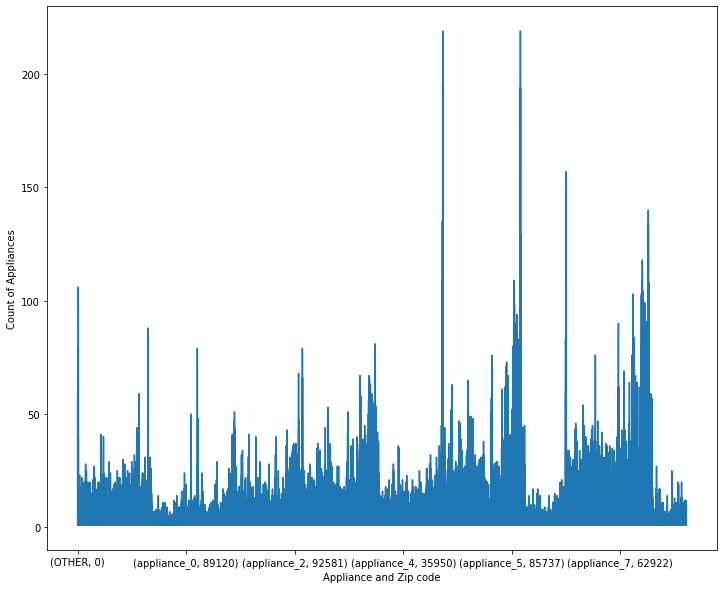

In [14]:
# Insights regarding sales of appliance broken down by zipcode

appliance_breakdown = df_500k.groupby(['appliance','zip_code'])['appliance'].count()

appliance_breakdown.plot(figsize=(12,10), xlabel='Appliance and Zip code', ylabel='Count of Appliances')

<AxesSubplot:xlabel='Appliance and Zip code', ylabel='Count of PM in next month'>

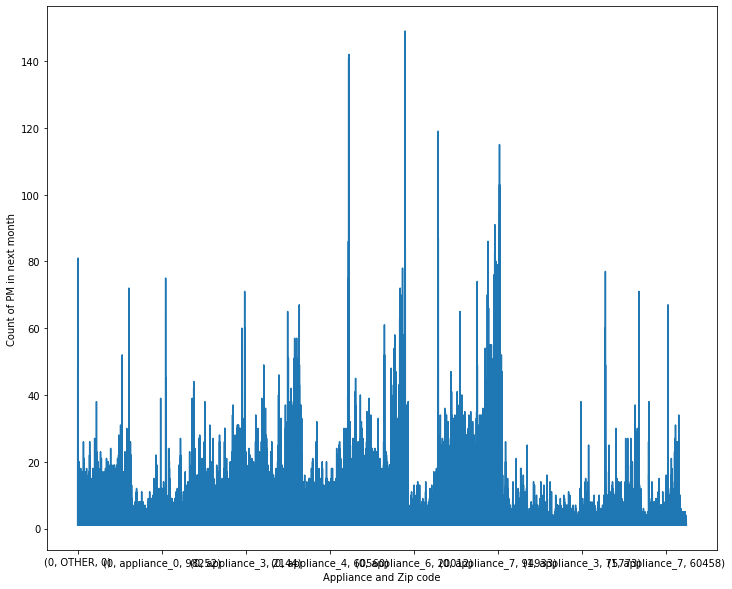

In [15]:
appliance_breakdown_Y = df_500k.groupby(['y','appliance','zip_code'])['pid'].count()
appliance_breakdown_Y
#appliance_breakdown_Y.sort_values(ascending=False)


appliance_breakdown_Y.plot(figsize=(12,10), xlabel='Appliance and Zip code', ylabel='Count of PM in next month')

In [16]:
appliance_breakdown_Y = df_500k.groupby(['appliance','zip_code'])['y'].sum()
appliance_breakdown_Y.sort_values(ascending=False) 

appliance    zip_code
appliance_5  926         77
             96744       71
             96720       70
appliance_7  67801       67
appliance_5  612         60
                         ..
appliance_3  2666         0
             2664         0
             2660         0
             2655         0
appliance_8  99623        0
Name: y, Length: 112182, dtype: int64

In [17]:
df_500k['brand'].value_counts().sort_values(ascending=False)

brand_2    264182
brand_4     63459
OTHER       51889
brand_6     30481
brand_5     22380
brand_0     21167
brand_7     19870
brand_3     15366
brand_1     11170
Name: brand, dtype: int64

In [18]:
#checking the number of unique rows for zip_code - census dataset
len(df_census.zip_code.unique())

33096

In [19]:
#checking the number of unique rows for zip_code - 500k dataset
len(df_500k.zip_code.unique())

19118

In [20]:
#merging the two datasets
df_merged = df_500k.merge(df_census, how='left')
df_merged

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL
0,928277,2021-11-01,95122,2017-02-08,brand_2,appliance_2,0,1,0,1900-01-01,...,8.25,7.88,30.0,5.0,86.34,56.68,96.76,48.42,48.34,3.24
1,55343,2020-04-01,29356,2017-04-04,brand_2,appliance_3,0,1,0,1900-01-01,...,17.54,19.83,47.0,2.0,68.35,53.71,82.18,65.52,16.66,17.82
2,7757,2020-07-01,2474,2017-05-19,brand_1,appliance_3,0,1,0,1900-01-01,...,12.13,15.00,40.0,2.0,57.20,45.35,95.43,54.49,40.94,4.57
3,571564,2020-09-01,38871,2018-05-21,brand_4,appliance_5,0,1,0,1900-01-01,...,12.87,13.90,39.0,3.0,75.16,62.82,89.15,76.99,12.16,10.85
4,666346,2021-02-01,48625,2015-11-27,brand_2,appliance_8,0,1,0,1900-01-01,...,15.93,20.30,47.0,2.0,64.26,48.80,48.73,39.29,9.45,51.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499959,62268,2020-12-01,10301,2017-04-30,brand_4,appliance_8,0,1,0,1900-01-01,...,11.90,11.92,36.0,3.0,58.53,36.43,90.52,37.22,53.30,9.48
499960,895615,2021-02-01,21047,2019-08-01,brand_2,appliance_7,0,2,0,1900-01-01,...,15.15,16.03,45.0,3.0,85.55,76.91,96.25,91.19,5.05,3.75
499961,1152794,2021-05-01,90706,2019-04-21,brand_7,appliance_5,1,3,0,1900-01-01,...,9.46,8.64,32.0,3.0,75.13,46.48,95.00,37.99,57.00,5.00
499962,1085514,2020-12-01,96792,2018-08-24,brand_3,OTHER,1,1,0,1900-01-01,...,10.44,9.12,31.0,4.0,79.35,49.11,87.81,51.61,36.20,12.19


In [21]:
#taking a look at the data for a particular zip_code
df_merged.loc[df_merged['zip_code'] == '95122']

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,...,CENSPCT_ADULT_AGE5564,CENSPCT_ADULT_AGEGE65,CENS_POP_MEDAGE,CENS_HH_AVGSIZE,CENSPCT_HH_FAMILY,CENSPCT_HH_FAMILYHUSBWIFE,CENSPCT_HU_OCCUPIED,CENSPCT_HU_OWNED,CENSPCT_HU_RENTED,CENSPCT_HU_VACANTSEASONAL


In [22]:
#checking the null values for the merged dataset
df_merged.isna().sum()

pid                               0
base_date                         0
zip_code                          0
app_sl_dt                         0
brand                             0
appliance                         0
y                                 0
#appliance                        0
total_calls                       0
last_pm_chk_dt                    0
days_since_last_pm                0
o1_no_days                        0
o1_app_age_days                   0
o1_total_parts                    0
o1_parts_costs               370627
o1_so_status_flag                 0
o1_pm_chk_flg                370627
city                           3548
state                          3548
CENSPCT_WATER                  3548
CENS_POP_DENSITY               3548
CENS_HU_DENSITY                3548
CENSPCT_POP_WHITE              3548
CENSPCT_POP_BLACK              3548
CENSPCT_POP_AMERIND            3548
CENSPCT_POP_ASIAN              3548
CENSPCT_POP_PACISL             3548
CENSPCT_POP_OTHRACE         

In [23]:
#since there are a multitude of null values in the merged dataset, hence we'll use the first one for our model
#columns we'll use for building our model - base_date,zip_code,appliance,brand,app_sl_dt
#we'll refrain from using the other columns; this is because earlier we saw that a high percentage of data for these columns was null
#converting the columns in the right format for our model'
df_500k['base_date_year'] = pd.to_datetime(df_500k['base_date']).dt.year
df_500k['base_date_month'] = pd.to_datetime(df_500k['base_date']).dt.month
df_500k['base_date_day'] = pd.to_datetime(df_500k['base_date']).dt.day
df_500k['app_sl_dt_year'] = pd.to_datetime(df_500k['app_sl_dt']).dt.year
df_500k['app_sl_dt_month'] = pd.to_datetime(df_500k['app_sl_dt']).dt.month
df_500k['app_sl_dt_day'] = pd.to_datetime(df_500k['app_sl_dt']).dt.day
df_500k

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,...,o1_total_parts,o1_parts_costs,o1_so_status_flag,o1_pm_chk_flg,base_date_year,base_date_month,base_date_day,app_sl_dt_year,app_sl_dt_month,app_sl_dt_day
0,928277,2021-11-01,95122,2017-02-08,brand_2,appliance_2,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,11,1,2017,2,8
1,55343,2020-04-01,29356,2017-04-04,brand_2,appliance_3,0,1,0,1900-01-01,...,0,0.00,CA,False,2020,4,1,2017,4,4
2,7757,2020-07-01,2474,2017-05-19,brand_1,appliance_3,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,7,1,2017,5,19
3,571564,2020-09-01,38871,2018-05-21,brand_4,appliance_5,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,9,1,2018,5,21
4,666346,2021-02-01,48625,2015-11-27,brand_2,appliance_8,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,2,1,2015,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,62268,2020-12-01,10301,2017-04-30,brand_4,appliance_8,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,12,1,2017,4,30
499996,895615,2021-02-01,21047,2019-08-01,brand_2,appliance_7,0,2,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,2,1,2019,8,1
499997,1152794,2021-05-01,90706,2019-04-21,brand_7,appliance_5,1,3,0,1900-01-01,...,1,68.54,CO,False,2021,5,1,2019,4,21
499998,1085514,2020-12-01,96792,2018-08-24,brand_3,OTHER,1,1,0,1900-01-01,...,10,68.22,CO,False,2020,12,1,2018,8,24


In [24]:
df_500k.appliance.unique()

array(['appliance_2', 'appliance_3', 'appliance_5', 'appliance_8',
       'appliance_4', 'appliance_7', 'appliance_1', 'appliance_0',
       'appliance_6', 'OTHER'], dtype=object)

In [25]:
#for the columns brand and appliance, we'll convert the values to int
df_500k.loc[df_500k['brand'] == 'brand_0', 'brand'] = 0
df_500k.loc[df_500k['brand'] == 'brand_1', 'brand'] = 1
df_500k.loc[df_500k['brand'] == 'brand_2', 'brand'] = 3
df_500k.loc[df_500k['brand'] == 'brand_3', 'brand'] = 4
df_500k.loc[df_500k['brand'] == 'brand_4', 'brand'] = 5
df_500k.loc[df_500k['brand'] == 'brand_5', 'brand'] = 6
df_500k.loc[df_500k['brand'] == 'brand_6', 'brand'] = 7
df_500k.loc[df_500k['brand'] == 'brand_7', 'brand'] = 8
df_500k.loc[df_500k['brand'] == 'OTHER', 'brand'] = 99

df_500k.loc[df_500k['appliance'] == 'appliance_0', 'appliance'] = 0
df_500k.loc[df_500k['appliance'] == 'appliance_1', 'appliance'] = 1
df_500k.loc[df_500k['appliance'] == 'appliance_2', 'appliance'] = 2
df_500k.loc[df_500k['appliance'] == 'appliance_3', 'appliance'] = 3
df_500k.loc[df_500k['appliance'] == 'appliance_4', 'appliance'] = 4
df_500k.loc[df_500k['appliance'] == 'appliance_5', 'appliance'] = 5
df_500k.loc[df_500k['appliance'] == 'appliance_6', 'appliance'] = 6
df_500k.loc[df_500k['appliance'] == 'appliance_7', 'appliance'] = 7
df_500k.loc[df_500k['appliance'] == 'appliance_8', 'appliance'] = 8
df_500k.loc[df_500k['appliance'] == 'OTHER', 'appliance'] = 99
df_500k

,pid,base_date,zip_code,app_sl_dt,brand,appliance,y,#appliance,total_calls,last_pm_chk_dt,...,o1_total_parts,o1_parts_costs,o1_so_status_flag,o1_pm_chk_flg,base_date_year,base_date_month,base_date_day,app_sl_dt_year,app_sl_dt_month,app_sl_dt_day
0,928277,2021-11-01,95122,2017-02-08,3,2,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,11,1,2017,2,8
1,55343,2020-04-01,29356,2017-04-04,3,3,0,1,0,1900-01-01,...,0,0.00,CA,False,2020,4,1,2017,4,4
2,7757,2020-07-01,2474,2017-05-19,1,3,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,7,1,2017,5,19
3,571564,2020-09-01,38871,2018-05-21,5,5,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,9,1,2018,5,21
4,666346,2021-02-01,48625,2015-11-27,3,8,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,2,1,2015,11,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,62268,2020-12-01,10301,2017-04-30,5,8,0,1,0,1900-01-01,...,0,NaN,OTHER,<NA>,2020,12,1,2017,4,30
499996,895615,2021-02-01,21047,2019-08-01,3,7,0,2,0,1900-01-01,...,0,NaN,OTHER,<NA>,2021,2,1,2019,8,1
499997,1152794,2021-05-01,90706,2019-04-21,8,5,1,3,0,1900-01-01,...,1,68.54,CO,False,2021,5,1,2019,4,21
499998,1085514,2020-12-01,96792,2018-08-24,4,99,1,1,0,1900-01-01,...,10,68.22,CO,False,2020,12,1,2018,8,24


In [26]:
#for building a model, we'll apply the logistic regression for the fact that the nature of the target variable is boolean (2 values)
#initializing the target variable | the aspect that needs to be predicted
targetVariableY = df_500k.y

#initializing feature elements
#declaring the features in the dataset
featureElementsDF = ['base_date_year','base_date_month','base_date_day', 'app_sl_dt_year', 'app_sl_dt_month', 'app_sl_dt_day', 'zip_code', 'appliance', 'brand']

#extracting and separting the features from the dataset and storing it in another collection
featureSetDF = df_500k[featureElementsDF]
featureSetDF

,base_date_year,base_date_month,base_date_day,app_sl_dt_year,app_sl_dt_month,app_sl_dt_day,zip_code,appliance,brand
0,2021,11,1,2017,2,8,95122,2,3
1,2020,4,1,2017,4,4,29356,3,3
2,2020,7,1,2017,5,19,2474,3,1
3,2020,9,1,2018,5,21,38871,5,5
4,2021,2,1,2015,11,27,48625,8,3
...,...,...,...,...,...,...,...,...,...
499995,2020,12,1,2017,4,30,10301,8,5
499996,2021,2,1,2019,8,1,21047,7,3
499997,2021,5,1,2019,4,21,90706,5,8
499998,2020,12,1,2018,8,24,96792,99,4


In [27]:
#shuffling the dataset - this is achieved by setting the shuffle attribute as True
#splitting the dataset in the ratio of 20:80::testing:training sets - this is achieved by setting the test_size attribute to 0.2
#supplying the feature set and the target variable initialized above as the inputs, the function returns the shuffled and split data sets
featureElementsTrainDF, featureElementsTestDF, targetVariableDFTrain, targetVariableDFTest = train_test_split(featureSetDF, targetVariableY, test_size=0.2, shuffle= True)

In [28]:
#initializing LogisticRegression model variable
#note that here we've set the maximum number of iterations as 100000 to avoid the warning for convergence
LogReg = LogisticRegression(solver='lbfgs', max_iter= 100000)
LogReg.fit(featureElementsTrainDF, targetVariableDFTrain)

LogisticRegression(max_iter=100000)

In [29]:
#running predictions for the train data
targetVariableDFPredictedTrain = LogReg.predict(featureElementsTrainDF)

In [30]:
#running predictions for the test data
targetVariableDFPredictedTest = LogReg.predict(featureElementsTestDF)

In [31]:
#guaging the accuracy for the isSpam prediction for the train data
metrics.accuracy_score(targetVariableDFTrain, targetVariableDFPredictedTrain)

0.8441787029559643

In [32]:
#guaging the accuracy for the isSpam prediction for the test data
metrics.accuracy_score(targetVariableDFTest, targetVariableDFPredictedTest)

0.8456891982438771